In [1]:
# Visualisation
import matplotlib.pyplot as plt
%matplotlib tk
# Saving settings
%autosave 180
%load_ext autoreload
%autoreload 2

# Computing
import numpy as np

#
from utils_local import Volition

Autosaving every 180 seconds


In [2]:
####################################################       
####################################################       
####################################################       
#
root_dir = "/media/cat/4TB/donato/nathalie"
animal_id = "DON-007050"

# "DON-007050"
# "DON-007417"
# "DON-007021"

####################################################
vol = Volition(root_dir, 
               animal_id)

# convert .csv to .npy 
vol.convert_locations()

#
print ("DONE...")

  8%|▊         | 1/12 [00:00<00:09,  1.18it/s]

spines.shape:  (8, 36000, 2)


 17%|█▋        | 2/12 [00:01<00:08,  1.16it/s]

spines.shape:  (8, 36000, 2)


 25%|██▌       | 3/12 [00:02<00:07,  1.16it/s]

spines.shape:  (8, 36000, 2)


 33%|███▎      | 4/12 [00:03<00:06,  1.16it/s]

spines.shape:  (8, 36000, 2)


 42%|████▏     | 5/12 [00:04<00:06,  1.15it/s]

spines.shape:  (8, 36000, 2)


 50%|█████     | 6/12 [00:05<00:05,  1.15it/s]

spines.shape:  (8, 36000, 2)


 58%|█████▊    | 7/12 [00:06<00:04,  1.16it/s]

spines.shape:  (8, 36000, 2)


 67%|██████▋   | 8/12 [00:06<00:03,  1.16it/s]

spines.shape:  (8, 36000, 2)


 75%|███████▌  | 9/12 [00:07<00:02,  1.16it/s]

spines.shape:  (8, 36000, 2)


 83%|████████▎ | 10/12 [00:08<00:01,  1.16it/s]

spines.shape:  (8, 36000, 2)


 92%|█████████▏| 11/12 [00:09<00:00,  1.16it/s]

spines.shape:  (8, 36000, 2)


100%|██████████| 12/12 [00:10<00:00,  1.16it/s]

spines.shape:  (8, 36000, 2)
DONE...


In [3]:
##########################################################
################### DECODE ALL PERIODS ###################
##########################################################

#
vol.overwrite_bayes = True
vol.use_place_cells = False
vol.shuffle_bayes = False               # this is for control condition
vol.remove_nonvisited_locs = True       # this removes any location from test set that was not visited during training
vol.predict_immobile = False
vol.plot_bayesian_decoding = True

#
vol.speed_threshold = 2
vol.data_split = 0.9
vol.shuffle = False

#
vol.session_id = "FS10"
vol.load_data()

#
vol.bayesian_decoding(vol)

# vol.train_bayes()

#
print ("DONE")

... processing location csv
...processing neural data...
(36000, 374)
1253.9963 1267.0745
DONE
TODO: merge all moving periods with < 1 sec break between
Time moving:  827.55 , time not moving:  972.45
total time, total cells:  (16551, 374)
length of moving period:  827.55 sec
Frames with non-zero activity:  744.55  sec.
# cells with some activity in the period:  (294,)
X_in.shape:  (14891, 294)
y_in.shape:  (14891, 2)


100%|██████████| 294/294 [00:11<00:00, 25.54it/s]


test removed from training set because too far  3.0207536  cm
test removed from training set because too far  3.1763465  cm
test removed from training set because too far  3.3555825  cm
test removed from training set because too far  3.3953938  cm
test removed from training set because too far  3.3611217  cm
test removed from training set because too far  3.3659313  cm
test removed from training set because too far  3.228814  cm
test removed from training set because too far  3.064951  cm


100%|██████████| 1648/1648 [00:01<00:00, 1156.96it/s]
/home/cat/.conda/envs/donato/lib/python3.8/site-packages/numpy/lib/npyio.py:696: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)



DONE


In [5]:
##########################################################
######################## DECODE ##########################
##########################################################

#
vol.session_id = "FS10"
vol.use_place_cells_bayes = False
vol.load_bayes()

#
vol.movie_start_idx = 0
# set end to -1 to decode all movies
vol.movie_end_idx = 36000
vol.movie_idxs = np.arange(vol.movie_start_idx, vol.movie_end_idx, 1)

#!pip install progress
vol.predict_bayes_data()




#


start offset:  0
self.locs_cm.shape:  (36000, 2)
self.neural_data.shape:  (36000, 374)


100%|██████████| 36000/36000 [00:29<00:00, 1212.61it/s]

real locs:  (36000, 2)
predicted locs:  (36000, 2)


In [85]:
# print (vol.idx_imm.shape)
# vol.movie_start_idx = vol.idx_imm[0]
# vol.movie_end_idx = vol.idx_imm[3000]
# vol.movie_idxs = vol.idx_imm[:3000]

(19449,)


In [94]:
##########################################################
############ MAKE MOVIES OF DECODED VS REAL ##############
##########################################################
#
vol.make_movies_realtime()


spines.shape:  (8, 36000, 2)
n-frames:  3000
Angles:  []


In [96]:
#################################################################
############ MAKE MOVIES OF ANGLE TO HEAD ROTATION ##############
#################################################################

print ("CHANGE regression to just the head and tail... no need for linear fit!")
vol.make_movies_headangle()

CHANGE regression to just the head and tail... no need for linear fit!
spines.shape:  (8, 36000, 2)
Angles:  [0.6911939666528113, 0.630982604025779, 0.6293134652470964, 0.6568032974186637, 0.6339162798838309, 0.5661261948150675, 0.5577113990809178, 0.5548523134270651, 0.6108800228410045, 0.6225540974674698, 0.589423322698952, 0.544509869539199, 0.48104985327333055, 0.453655400973807, 0.6178703994363403, 0.6319067413605197, 0.6019854171854734, 0.621446345028194, 0.6263342473348001, 0.6441723115560185, 0.6782336623647077, 0.6918463570152816, 0.6959266962628646, 0.6876673304166437, 0.692082785283794, 0.6902836744707667, 0.6785885428932548, 0.6819010946610985, 0.7292367914307363, 0.7344463463748372, 0.7757922851846198, 0.7786396151233065, 0.777518112791093, 0.843123426470343, 0.8943652665487022, 0.9814793826859953, 1.1286844878771247, 1.1057108447523836, 1.0765683681032552, 1.0539926368711667, 1.0385752041389373, 0.1110131762101461, 0.13065345923104632, 1.1300087074420622, 0.12282228916681

In [12]:
##########################################################
################### COMPUTE ANGLES #######################
##########################################################
# Compute angles between animal and predicted location


# vol.movie_start_idx = 0
# vol.movie_end_idx = 10000
# vol.movie_idxs = np.arange(vol.movie_start_idx, vol.movie_end_idx, 1)
# vol.movie_idxs = vol.idx_mob

#
names = ['all','immobile','mobile']

#
subsample = 2
idxs = [np.arange(0,36000,1)[::subsample],
        vol.idx_imm[::subsample],
        vol.idx_mob[::subsample]
        ]

#
shuffle_angles = [False, True]
vol.shuffle_angles  = shuffle_angles[0]
#
ctr=0
plt.figure()
ax = plt.subplot()
ctr2=0
linetypes = ['-', '--']
clrs = ['black','blue','red']
maxs = 0
for ctr, idx_ in enumerate(idxs):
       vol.movie_idxs = idx_

       vol.predict_bayes_data()

       #
       vol.compute_angles()

       #
       width = np.pi/6
       theta = np.arange(-np.pi,np.pi+2*width,width)
       radii = np.histogram(np.array(vol.angles), bins = theta)

       # 
       y = radii[0]
       #theta*=180/np.pi
       y[-1]=y[0]
       ax.plot(theta[:-1] +width//2, #+180, 
              y, 
              linestyle=linetypes[ctr2],
              color=clrs[ctr],
              alpha=1,
              linewidth=3, 
              label=names[ctr])
       
        # find max y avlue for each loop and rplace if larger
       if max(y)>maxs:
           maxs = max(y)

# plot line at x=0
plt.ylim(bottom=0)
# change xticks from degrees to radians
xticks = np.arange(-np.pi,np.pi+np.pi/6,np.pi)
xticklabels = ['$-\pi$', '$0$', '$\pi$']

plt.xticks(xticks, xticklabels)
#plt.xlim(-180,180)
ax.plot([0,0],[0,maxs],'--',c='black')

# make tick labels larger
plt.tick_params(axis='both', which='both', labelsize=20)
# remove yticks
plt.yticks([])

plt.legend()
plt.show()

# save figure as svg
fname_out = '/home/cat/angles.svg'
plt.savefig(fname_out, format='svg', dpi=300)

start offset:  0
self.locs_cm.shape:  (36000, 2)
self.neural_data.shape:  (36000, 374)


100%|██████████| 18000/18000 [00:14<00:00, 1210.12it/s]


real locs:  (18000, 2)
predicted locs:  (18000, 2)
Angles:  [-0.7256307678069811, -0.6924068821278111, -0.7125474008375715, -0.8326883201794668, -0.9981048885314986, -1.0719081531503003, -0.6453127471804888, -0.6370372597916442, -0.8134396115436604, -0.9519876592610806, -0.9706545018889658, -1.0558230314911408, -1.1325509854886493, -1.2372367247364344, -1.2250668428629703, -1.221756997204351, -1.056780423711728, -0.863865549391362, -0.7035801373571607, -0.635669775570211, -0.6742835751512596, -0.6038859664204659, -0.6343330247856684, -0.7777359563715357, -0.9662352728541896, -1.1250591359959097, -1.2591121049901213, -1.4079039531032318, -1.2484875011463494, -1.143127996975387, -0.8415640469917024, -0.4584421825893779, -0.325439531993022, -0.2856967608027874, -0.11186976862364637, 0.0999361839217215, 0.20237514949644905, 0.28210267595761307, 0.17804429225102833, 0.12540784073823297, 0.24035424582360562, 0.291134135006404, 0.4769111888981114, 0.885608254567861, 1.4358910318699902, 1.8943

100%|██████████| 9725/9725 [00:08<00:00, 1208.23it/s]


real locs:  (9725, 2)
predicted locs:  (9725, 2)
Angles:  [0.7153782696356293, 0.6784074723966607, 0.596445112184444, 0.6979023903674303, 0.7373270863836876, 0.7323655260944869, 0.6978240106308256, 0.6865583598839752, 0.7135930921994823, 0.7507157485421597, 0.7516797986583952, 0.7634191871313579, 0.7618243100163357, 0.8761891729244764, 0.9295836123084933, 0.8632454757461655, 0.8544773154252284, 0.835560531202662, 0.8806884862612281, 1.0044112169225368, 1.0459986520941873, 1.084215276462492, 1.0974941005501642, 1.152403247575033, 1.1533819510119547, 1.4134038525292816, 1.417521034610683, 1.6067721182823098, -1.05655717819113, -1.002136517129622, -0.9037715714453652, -1.3551604087028484, -0.9803143900066006, -0.957748505855582, -0.896126909632292, -0.8745740762407896, -0.9111157984845303, -1.1538349532914145, -1.0336949494510959, -1.0030156488699409, -0.938805682787631, -0.9490689295495875, -0.4733617500559872, -0.4584998637689421, -0.39836803458840375, -0.9779939841496149, -0.8403726919

100%|██████████| 8276/8276 [00:06<00:00, 1195.73it/s]


real locs:  (8276, 2)
predicted locs:  (8276, 2)
Angles:  [-0.7256307678069811, -0.6924068821278111, -0.7125474008375715, -0.8326883201794668, -0.9981048885314986, -1.0719081531503003, -0.6453127471804888, -0.6370372597916442, -0.8134396115436604, -0.9519876592610806, -0.9706545018889658, -1.0558230314911408, -1.1325509854886493, -1.2372367247364344, -1.2250668428629703, -1.221756997204351, -1.056780423711728, -0.863865549391362, -0.7035801373571607, -0.635669775570211, -0.6742835751512596, -0.6038859664204659, -0.6343330247856684, -0.7777359563715357, -0.9662352728541896, -1.1250591359959097, -1.2591121049901213, -1.4079039531032318, -1.2484875011463494, -1.143127996975387, -0.8415640469917024, -0.4584421825893779, -0.325439531993022, -0.2856967608027874, -0.11186976862364637, 0.0999361839217215, 0.20237514949644905, 0.28210267595761307, 0.17804429225102833, 0.12540784073823297, 0.24035424582360562, 0.291134135006404, 0.4769111888981114, 0.885608254567861, 1.4358910318699902, 1.894346

In [9]:
print (vol.spines.shape)

(8, 1656, 2)


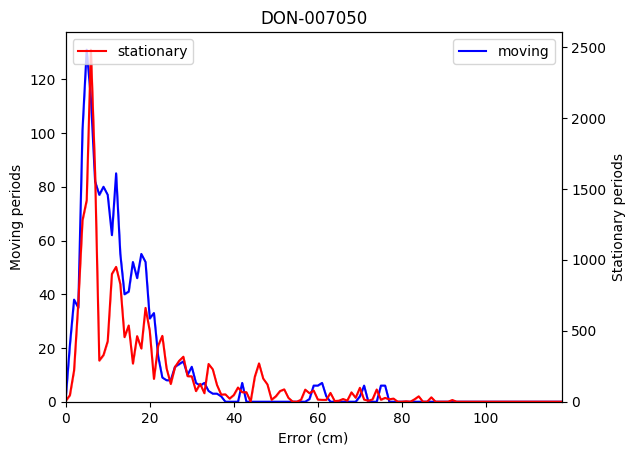

In [ ]:
## ################## PLOT ERRORS ####################
###################################################
#
# visualize decoding results
vol.use_place_cells_bayes = False

#
vol.plot_decoder_errors()
    

non-zero [ca], i.e. active frames:  (1254,)
idx mobile periods:  (1254,)
imm true:  (1254, 2)


100%|██████████| 500/500 [00:06<00:00, 83.30it/s]


non-zero [ca], i.e. active frames:  (1254,)
idx mobile periods:  (1254,)
imm true:  (1254, 2)


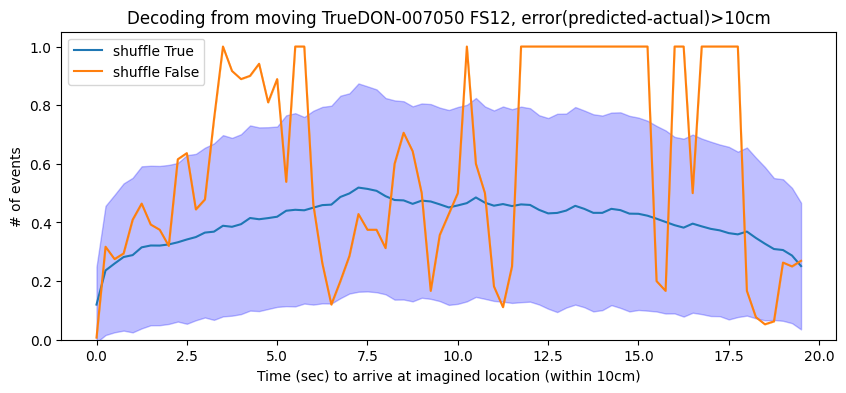

In [ ]:
##########################################################
########### FORWARD / BACKWARD MATCHES ANALYSIS ##########
##########################################################
#
vol.n_sec = 20   # no. of seconds to search forward and backward in time
vol.fps = 20    # imaging rate
vol.min_dist_difference = 10                  # how far must the imagined location from current location be in order to consider it a projected location
vol.min_dist_approached = 10   # how close must the mouse come ot the imagined location

vol.bin_width = 0.25
vol.n_shuffles = 500
vol.session_id = "FS12"
vol.direction = 'forward'  # 'forward', 'backward'
vol.mobile = True

#
vol.before_running = False


# process data
shuffles= [True, False]
plt.figure(figsize=(10,4))
ax=plt.subplot(111)
colors=['blue','orange']
for ctr,shuffle in enumerate(shuffles):
    vol.shuffle_match = shuffle

    #
    vol.get_matches_forward_backward()

    #
    plt.plot(vol.x, vol.hist, label='shuffle '+str(vol.shuffle_match))
    
    #
    ax.fill_between(vol.x, vol.hist - vol.std, vol.hist + vol.std,
                    color=colors[ctr], alpha=.25)

plt.xlabel("Time (sec) to arrive at imagined location (within "+str(vol.min_dist_approached)+"cm)")
plt.legend()
plt.ylabel("# of events")
plt.ylim(bottom=0)
plt.title("Decoding from moving "+ str(vol.mobile) + vol.animal_id + " " + vol.session_id + ", error(predicted-actual)>"+str(vol.min_dist_difference)+"cm")
plt.savefig('/home/cat/imaginge.png')
plt.show()


(7760,) (7760,)


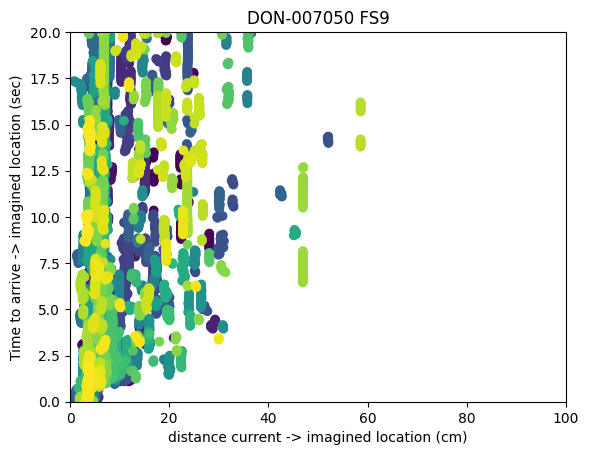

In [ ]:
#########################################################
############ TIME vs. DISTANCE IMAGINED LOCATIONS #######
#########################################################

#
dists_array = np.hstack(vol.dists_array)
match_array = np.hstack(vol.match_times_array)
print (dists_array.shape, match_array.shape)

plt.figure()
plt.scatter(dists_array, 
            match_array,
           c=np.arange(dists_array.shape[0]))
    
plt.xlabel("distance current -> imagined location (cm)")
plt.ylabel("Time to arrive -> imagined location (sec)")
plt.xlim(0,100)
plt.ylim(0,vol.n_sec)
plt.title(vol.animal_id + " "+ vol.session_id)
plt.show()


In [ ]:
################################################
################################################
################################################
#
fname = os.path.join(vol.root_dir,
                    vol.animal_id,
                    vol.session_id,
                    'bayes_decoder_place_cells_False.npz')
print (fname)
data = np.load(fname, allow_pickle=True)

#
idx_imm = data['idx_imm']
idx_mob = data['idx_mob']
speed = data['speed']

#
print (speed.shape, idx_imm.shape, idx_mob.shape)

#
imm_bouts = vol.get_bouts(idx_imm)
mob_bouts = vol.get_bouts(idx_mob)
print (imm_bouts.shape, mob_bouts.shape)


/media/cat/4TB/donato/nathalie/DON-007050/FS9/bayes_decoder_place_cells_False.npz
(36000,) (21034,) (14966,)
(139, 2) (140, 2)


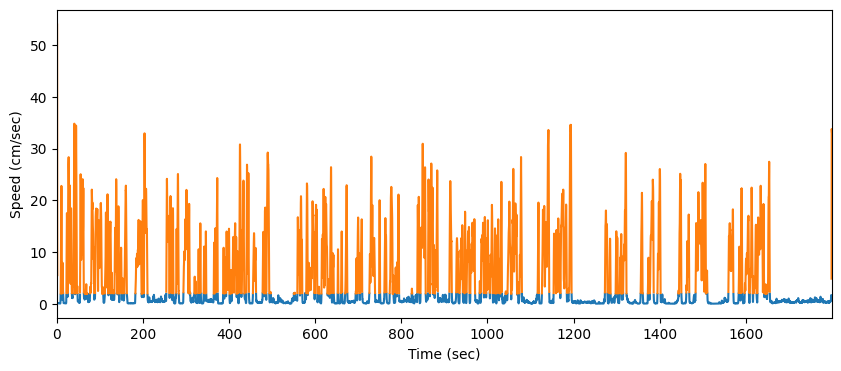

In [ ]:
plt.figure(figsize=(10,4))
x = np.arange(speed.shape[0])/vol.fps
idx = np.where(speed > vol.speed_threshold)[0]
idx2 = np.where(speed < vol.speed_threshold)[0]

#
x1 = x.copy()
x2 = x.copy()
speed1 = speed.copy()
speed2 = speed.copy()

#
speed1[idx]=np.nan
x1[idx]=np.nan

#
x2[idx2]=np.nan
speed2[idx2]=np.nan
#
plt.plot(x1,speed1)
plt.plot(x2,speed2)
plt.xlim(x[0],x[-1])
plt.xlabel("Time (sec)")
plt.ylabel("Speed (cm/sec)")

plt.show()

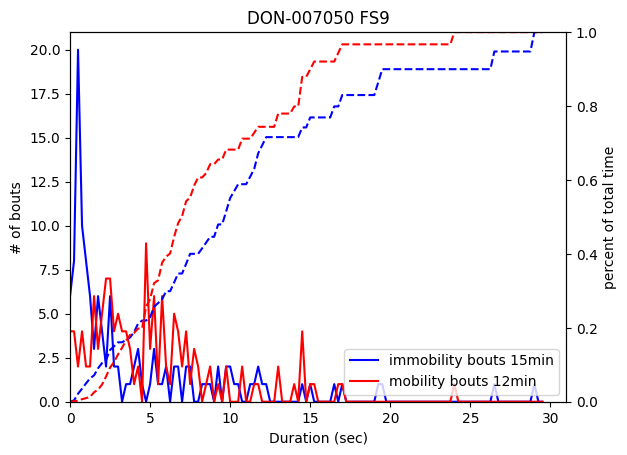

In [ ]:
plt.figure()
ax =plt.subplot(1,1,1)
temp = (imm_bouts[:,1]-imm_bouts[:,0])/vol.fps
y1 = np.histogram(temp, bins=np.arange(0,30,.25))
x = y1[1][:-1]
plt.plot(x,y1[0], c='blue',label='immobility bouts '+str(int(temp.sum()/60))+"min")


#
temp = (mob_bouts[:,1]-mob_bouts[:,0])/vol.fps
y2 = np.histogram(temp, bins=np.arange(0,30,.25))
plt.plot(x,y2[0], c='red', label='mobility bouts '+str(int(temp.sum()/60))+"min")
plt.legend(loc=4)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.ylabel("# of bouts")
plt.xlabel('Duration (sec)')

#
ax2 = ax.twinx()
c = np.cumsum(y1[0]*y1[1][:-1])
c = c/np.max(c)
ax2.plot(x,c, '--',c='blue')
ax2.set_ylim(0,1)
ax2.set_xlim(left=0)

c = np.cumsum(y2[0]*y2[1][:-1])
c = c/np.max(c)
ax2.plot(x,c, '--',c='red')
ax2.set_ylabel("percent of total time")
plt.title(vol.animal_id + " " + vol.session_id)
plt.savefig('/home/cat/bouts.png')
plt.show()



In [ ]:
plt.figure()

x = np.arange(speed.shape[0])/20.
plt.plot(x[idx_imm],speed[idx_imm],
        c='red')

plt.plot(x[idx_mob],speed[idx_mob],
        c='blue')

plt.xlim(x[0],x[-1])
plt.ylim(bottom=0)
plt.show()

In [ ]:
####################################################

plt.figure()
plt.scatter(y_test[:,0],y_test[:,1],
            c=np.arange(y_test.shape[0]),
            s=distances_bayes*5,
            cmap='viridis')

#
plt.scatter(y_bayes[:,0],
            y_bayes[:,1],
            c=np.arange(y_bayes.shape[0]),
            cmap='magma')

#
plt.show()

NameError: name 'y_test' is not defined

In [ ]:
####################################################################################################
########## TEST WHETHER MOUSE GOES THROUGH PREDICTED LOCATION IN PREVIOUS / FUTURE PERIODS #########
####################################################################################################

n_frames = 18

#
print (idx_imm[:n_frames])

#
print (y_bayes[:n_frames])

#

print (X_test[:n_frames])

#
s = X_test[:n_frames]-X_test[0]
print (s.sum())

#
for k in range(n_frames):
    idx = np.where(X_test[k]!=0)
    print (idx)


[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


NameError: name 'y_bayes' is not defined

In [ ]:
d = np.load('/media/cat/4TB/donato/nathalie/DON-007050/FS1/place_cells.npy',
            allow_pickle=True)
print (d[0])

{'cell_id': 3, 'overlaps': [0.6558441558441559], 'spatial_info': [2.5525348609366976, 2.8140883482451713, 2.8286039804275, 0.9101248643011705, 1.3278752092892459, 1.3438674239649162, 1.123412603243331, 1.1561605631378915, 1.279342196542679, 1.8810676337781347, 1.7794684847830269, 1.2194517187141143, 1.2052842898692484, 1.1272377625249013, 1.1384000457492287, 1.1005289049304603, 1.5166405132421887, 1.4257672055011121, 1.1602136256409907, 1.1280544425648, 1.3793781677164407, 1.2206092962501665, 0.7943263602749769, 1.0991272043024367, 1.1466281439664288, 1.4946472634710573, 1.0346702957677676, 1.2568657912060663, 1.4666418088167332, 1.433578790880422, 1.3533591571273524, 1.4324653299697256, 1.1849935265293163, 1.134931905941554, 1.0065756336695728, 1.3099695445839674, 1.1245261148370511, 1.107881202186656, 1.2497142471880751, 1.7295170845657972, 1.4564907905192284, 1.1485146897273082, 1.6544858111817515, 1.2650603039306907, 1.0945374114345914, 1.1024764307211343, 1.298403967208392, 1.2592